In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error


## **Have Month Feature**

### **Load Data**

In [2]:
data = pd.read_csv('pre_data\HousePriceDatasetsCleaned.csv')

In [3]:
y = np.array(data.price.values)

In [4]:
data.columns

Index(['list_time', 'area', 'area_name', 'price', 'price_string', 'rooms',
       'property_legal_document', 'property_road_condition',
       'property_back_condition', 'size', 'ward', 'ward_name', 'toilets',
       'floors', 'house_type', 'furnishing_sell', 'longitude', 'latitude',
       'street_id', 'width', 'projectid', 'price_m2'],
      dtype='object')

In [5]:
data['list_time'] = pd.to_datetime(data['list_time'], format='%d %B %Y')
data['month'] = pd.DatetimeIndex(data['list_time']).month

In [6]:
data = data.drop(['price','price_string', 'price_m2','list_time', 'area_name', 'ward_name', 'street_id'], axis=1)
print(data.shape)

(20427, 16)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20427 entries, 0 to 20426
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     20427 non-null  int64  
 1   rooms                    20427 non-null  float64
 2   property_legal_document  20427 non-null  float64
 3   property_road_condition  20427 non-null  float64
 4   property_back_condition  20427 non-null  float64
 5   size                     20427 non-null  float64
 6   ward                     20427 non-null  int64  
 7   toilets                  20427 non-null  float64
 8   floors                   20427 non-null  float64
 9   house_type               20427 non-null  float64
 10  furnishing_sell          20427 non-null  float64
 11  longitude                20427 non-null  float64
 12  latitude                 20427 non-null  float64
 13  width                    20427 non-null  float64
 14  projectid             

In [8]:
x = np.array(data.values)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### **Random Forest Regressor**

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=180, max_depth=170, random_state=0, n_jobs=-1)
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test, y_test)

0.7808899768167221

In [41]:
rf_pred =rf_regressor.predict(x_test)

print('mean_absolute_percentage_error = {}'.format(mean_absolute_percentage_error(y_test, rf_pred)))
print('R2 score = {}'.format(r2_score(y_test, rf_pred)))

mean_absolute_percentage_error = 0.2551468111774229
R2 score = 0.7808899768167221


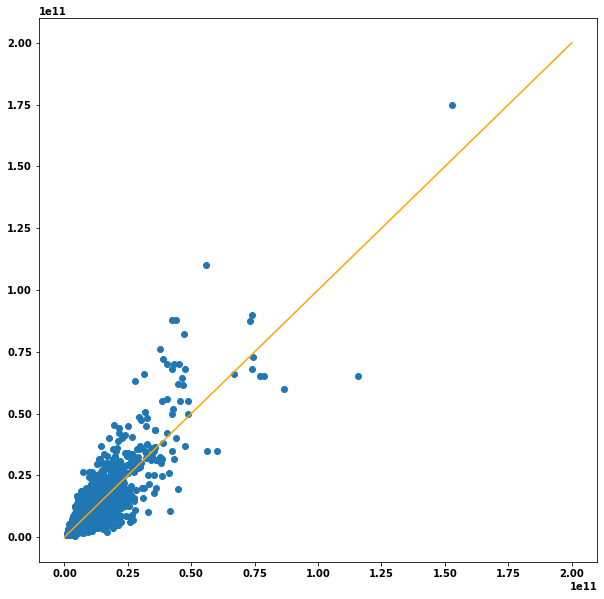

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,10))
plt.scatter(x=rf_pred, y=y_test)
sns.lineplot(x=[0, 2e11], y=[0, 2e11], color='orange')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=0)

param_grid = {
    'n_estimators': [160, 170, 180],
    'max_depth' : [150, 170, 200, None]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='r2', cv = cv, n_jobs = -1, verbose = 2)

result = grid_search.fit(data, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Score: 0.7766152553040989
Best Hyperparameters: {'max_depth': 170, 'n_estimators': 180}


### **Ridge Regression**

In [55]:
from sklearn.linear_model import Ridge

Rid = Ridge(alpha=1, solver='sparse_cg')
Rid.fit(x_train,y_train)
print('mean_absolute_percentage_error = {}'.format(mean_absolute_percentage_error(y_test, Rid.predict(x_test))))
print('R2 score = {}'.format(r2_score(y_test, Rid.predict(x_test))))

mean_absolute_percentage_error = 0.44230792855075346
R2 score = 0.6005568625461787


In [17]:
param = {
    'alpha':[1, 10, 100, 1000],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)

model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(data, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5713435196418611
Best Hyperparameters: {'alpha': 100, 'fit_intercept': True, 'normalize': False, 'solver': 'sparse_cg'}


D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


### **Lasso Regression**

In [54]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=1000)
las.fit(x_train,y_train)
print('mean_absolute_percentage_error = {}'.format(mean_absolute_percentage_error(y_test, las.predict(x_test))))
print('R2 score = {}'.format(r2_score(y_test, las.predict(x_test))))

mean_absolute_percentage_error = 0.44610458410648723
R2 score = 0.6034997481089508


### **Cross Validation**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

def RF_Regressor():
    return RandomForestRegressor(n_estimators=180, max_depth=170, random_state=0, n_jobs=-1)

def lasso():
    return Lasso(alpha=1000)

def ridge():
    return Ridge(alpha=1, solver='sparse_cg')

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

kf = KFold(n_splits=5, random_state=22, shuffle=True)

def cross_validation(model):
    R2 = []
    MAPE = []

    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        R2.append(r2_score(Y_test, pred))
        MAPE.append(mean_absolute_percentage_error(Y_test, pred))

    return R2, MAPE


In [28]:
#RandomForestRegresson

R2, MAPE = cross_validation(model=RF_Regressor())
print('R2 score: ', R2)
print('MAPE: ', MAPE)
print('AVG_R2_score : {}'.format(np.array(R2).mean()))
print('AVG_MAPE : {}'.format(np.array(MAPE).mean()))

R2 score:  [0.7604494360275922, 0.7613605098388266, 0.7792259681266464, 0.7696247857146361, 0.804784112478871]
MAPE:  [0.2537770311014525, 0.24289100708390332, 0.25019119781205, 0.2411086884777156, 0.24802871880666008]
AVG_R2_score : 0.7750889624373144
AVG_MAPE : 0.2471993286563563


In [29]:
#Ridge

R2, MAPE = cross_validation(model=ridge())
print('R2 score: ', R2)
print('MAPE: ', MAPE)
print('AVG_R2_score : {}'.format(np.array(R2).mean()))
print('AVG_MAPE : {}'.format(np.array(MAPE).mean()))


R2 score:  [0.5642998399370267, 0.5947592283910477, 0.5845276852758514, 0.5918193701000098, 0.6417386130867739]
MAPE:  [0.43420223645068673, 0.43579267962880736, 0.4520561768107548, 0.4258533335343494, 0.43917262902861376]
AVG_R2_score : 0.595428947358142
AVG_MAPE : 0.4374154110906424


In [30]:
#Lasso

R2, MAPE = cross_validation(model=lasso())
print('R2 score: ', R2)
print('MAPE: ', MAPE)
print('AVG_R2_score : {}'.format(np.array(R2).mean()))
print('AVG_MAPE : {}'.format(np.array(MAPE).mean()))

R2 score:  [0.5678914049661472, 0.5963232947829415, 0.58618044833574, 0.5941689965960728, 0.6441503607194734]
MAPE:  [0.43896059045801816, 0.4410975811426571, 0.4549370079926045, 0.4294183217145986, 0.44368110105473]
AVG_R2_score : 0.597742901080075
AVG_MAPE : 0.44161892047252166


## **No Month Feature**

### **Load Data**

In [3]:
data = pd.read_csv('pre_data\HousePriceDatasetsCleaned.csv')

In [4]:
y = np.array(data.price.values)

In [5]:
data.columns

Index(['list_time', 'area', 'area_name', 'price', 'price_string', 'rooms',
       'property_legal_document', 'property_road_condition',
       'property_back_condition', 'size', 'ward', 'ward_name', 'toilets',
       'floors', 'house_type', 'furnishing_sell', 'longitude', 'latitude',
       'street_id', 'width', 'projectid', 'price_m2'],
      dtype='object')

In [5]:
data = data.drop(['price','price_string', 'price_m2','list_time', 'area_name', 'ward_name', 'street_id'], axis=1)
print(data.shape)

(20427, 15)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20427 entries, 0 to 20426
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     20427 non-null  int64  
 1   rooms                    20427 non-null  float64
 2   property_legal_document  20427 non-null  float64
 3   property_road_condition  20427 non-null  float64
 4   property_back_condition  20427 non-null  float64
 5   size                     20427 non-null  float64
 6   ward                     20427 non-null  int64  
 7   toilets                  20427 non-null  float64
 8   floors                   20427 non-null  float64
 9   house_type               20427 non-null  float64
 10  furnishing_sell          20427 non-null  float64
 11  longitude                20427 non-null  float64
 12  latitude                 20427 non-null  float64
 13  width                    20427 non-null  float64
 14  projectid             

In [6]:
x = np.array(data.values)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### **Random Forest Regressor**

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=180, max_depth=170, random_state=0, n_jobs=-1)
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test, y_test)

0.7783368761625618

In [11]:
rf_pred =rf_regressor.predict(x_test)

print('mean_absolute_percentage_error = {}'.format(mean_absolute_percentage_error(y_test, rf_pred)))
print('R2 score = {}'.format(r2_score(y_test, rf_pred)))

mean_absolute_percentage_error = 0.2551419688562476
R2 score = 0.7783368761625618


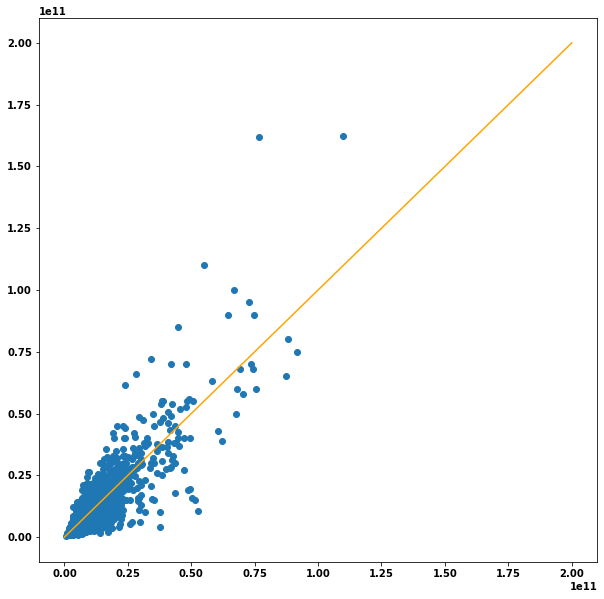

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,10))
plt.scatter(x=rf_pred, y=y_test)
sns.lineplot(x=[0, 2e11], y=[0, 2e11], color='orange')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=0)

param_grid = {
    'n_estimators': [160, 170, 180],
    'max_depth' : [150, 170, 200, None]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='r2', cv = cv, n_jobs = -1, verbose = 2)

result = grid_search.fit(data, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Score: 0.7783031923968213
Best Hyperparameters: {'max_depth': None, 'n_estimators': 160}


### **Ridge Regression**

In [14]:
from sklearn.linear_model import Ridge

Rid = Ridge(alpha=1, solver='sparse_cg')
Rid.fit(x_train,y_train)
print('mean_absolute_percentage_error = {}'.format(mean_absolute_percentage_error(y_test, Rid.predict(x_test))))
print('R2 score = {}'.format(r2_score(y_test, Rid.predict(x_test))))

mean_absolute_percentage_error = 0.44691432543245746
R2 score = 0.6150795263369


In [15]:
param = {
    'alpha':[1, 10, 100, 1000],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)

model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(data, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5989379204811411
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'auto'}


D:\Users\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


### **Lasso Regression**

In [17]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=1000)
las.fit(x_train,y_train)
print('mean_absolute_percentage_error = {}'.format(mean_absolute_percentage_error(y_test, las.predict(x_test))))
print('R2 score = {}'.format(r2_score(y_test, las.predict(x_test))))

mean_absolute_percentage_error = 0.45193972244721353
R2 score = 0.616971048262631


### **Cross Validation**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

def RF_Regressor():
    return RandomForestRegressor(n_estimators=160, random_state=0, n_jobs=-1)

def lasso():
    return Lasso(alpha=1000)

def ridge():
    return Ridge(alpha=1, solver='auto')

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

kf = KFold(n_splits=5, random_state=22, shuffle=True)

def cross_validation(model):
    R2 = []
    MAPE = []

    for train_index, test_index in kf.split(x):
        X_train, X_test = x[train_index], x[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        R2.append(r2_score(Y_test, pred))
        MAPE.append(mean_absolute_percentage_error(Y_test, pred))

    return R2, MAPE


In [11]:
R2 = []
MAPE = []
model=RF_Regressor()
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    R2.append(r2_score(Y_test, pred))
    MAPE.append(mean_absolute_percentage_error(Y_test, pred))

In [25]:
#RandomForestRegresson

R2, MAPE = cross_validation(model=RF_Regressor())
print('R2 score: ', R2)
print('MAPE: ', MAPE)
print('AVG_R2_score : {}'.format(np.array(R2).mean()))
print('AVG_MAPE : {}'.format(np.array(MAPE).mean()))

R2 score:  [0.7587082142305503, 0.7591932779717376, 0.779653404888512, 0.7658870043289576, 0.8017522794775047]
MAPE:  [0.2533340753864708, 0.2428194434815603, 0.24920728765660155, 0.23966710745808867, 0.24687238500676922]
AVG_R2_score : 0.7730388361794525
AVG_MAPE : 0.2463800597978981


In [26]:
#Ridge

R2, MAPE = cross_validation(model=ridge())
print('R2 score: ', R2)
print('MAPE: ', MAPE)
print('AVG_R2_score : {}'.format(np.array(R2).mean()))
print('AVG_MAPE : {}'.format(np.array(MAPE).mean()))


R2 score:  [0.5678113920773376, 0.5962453274623919, 0.5863353304772415, 0.5941294929894195, 0.6443686897889718]
MAPE:  [0.43867567153452824, 0.44088184984762596, 0.45459966114995437, 0.42899395227777004, 0.4429707307448228]
AVG_R2_score : 0.5977780465590725
AVG_MAPE : 0.44122437311094026


In [27]:
#Lasso

R2, MAPE = cross_validation(model=lasso())
print('R2 score: ', R2)
print('MAPE: ', MAPE)
print('AVG_R2_score : {}'.format(np.array(R2).mean()))
print('AVG_MAPE : {}'.format(np.array(MAPE).mean()))

R2 score:  [0.5678431510115569, 0.5962735404914064, 0.5863051159929725, 0.5941135456650548, 0.6443684468318707]
MAPE:  [0.4390500321160165, 0.4413240689784947, 0.45510506949213836, 0.42959919497051874, 0.44344039682640285]
AVG_R2_score : 0.5977807599985723
AVG_MAPE : 0.44170375247671423
